# 2.9 Synthetic noise



Here we will construct a time series with 1 ricker wavelet as a source and synthetic noise

We will analyze their statistical properties and compare the distributions. Present this as a binary classification problem.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [43]:
fs = 100. # sampling rate
twin = 50. # window length
t = np.linspace(0,twin,int(twin*fs)) #points = 100

## 1. Event Signal

We will create an event signal as a Ricker wavelet of specified width, 4 seconds in time.

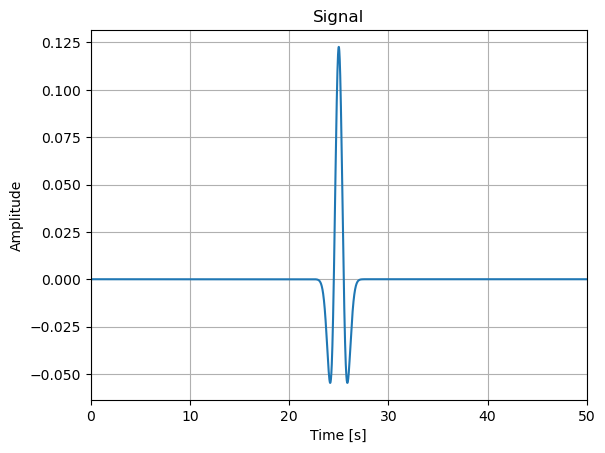

In [44]:
a = 50 # proportional to the width of the wavelet, about a factor of 10
sa = sig.ricker(int(a*fs), a)
# plate the signal in the middle of the time series
s = np.concatenate((np.zeros(len(t)//2-len(sa)//2),sa,np.zeros(len(t)//2-len(sa)//2)))

# plot the signal with nice labels and legends and crispy fonts
plt.figure()
plt.plot(t,s)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim([0,50])
plt.title('Signal')
plt.show()


The Ricker wavelet is a smooth function with a signal in a specific frequency band. Let's plot it's absolute Fourier amplitude spectrum.

In [45]:
from scipy.fftpack import fft, fftfreq, next_fast_len

## FFT the signals
# fill up until 2^N value to speed up the FFT
Nfft = next_fast_len(len(s)) # this will be an even number

freqVec = fftfreq(Nfft, d=1/fs)[:Nfft//2]
Zhat = fft(s,n=Nfft)

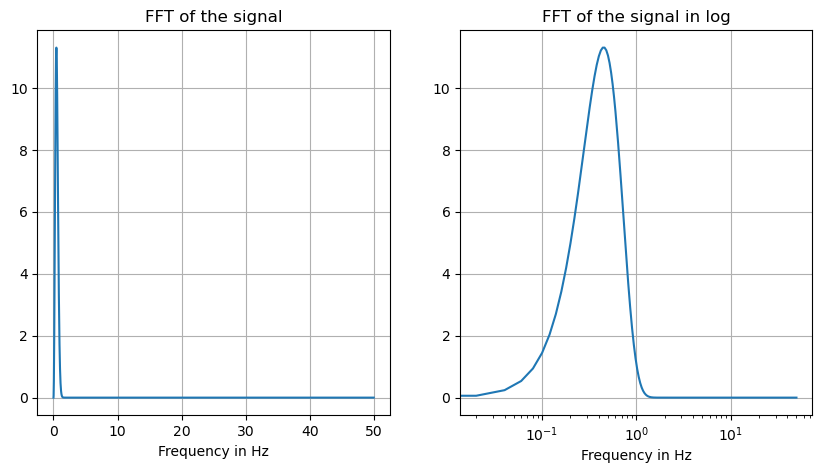

In [46]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(freqVec, np.abs(Zhat[:Nfft//2]))
ax[0].grid()
ax[0].set_title('FFT of the signal')
ax[0].set_xlabel('Frequency in Hz')
ax[1].plot(freqVec, np.abs(Zhat[:Nfft//2]))
ax[1].set_xscale('log')
ax[1].set_xlabel('Frequency in Hz')
ax[1].set_title('FFT of the signal in log')
ax[1].grid()

What does the event data distribution looks like?

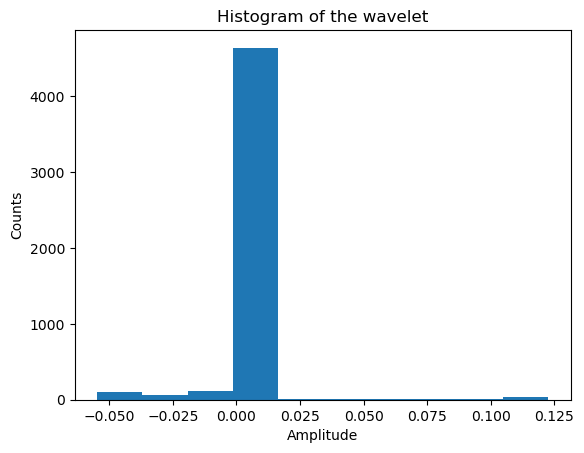

In [47]:
plt.hist(sa,bins=10)
plt.xlabel('Amplitude')
plt.ylabel('Counts')
plt.title('Histogram of the wavelet')
plt.show()

We created a pure signal not contaminated by noise. Let's create a *noise* time series to add on the *signal* time series.

Synthetic noise may take several form.

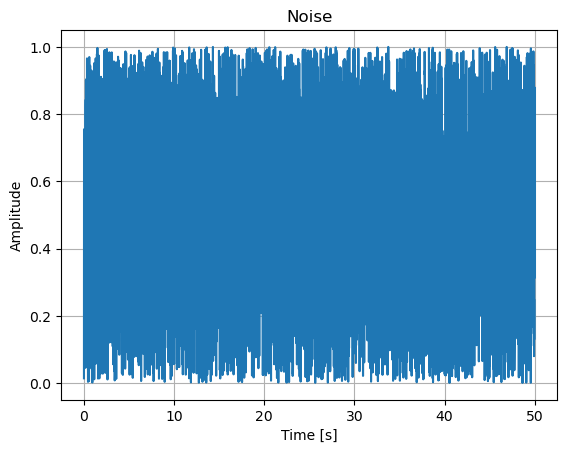

In [48]:
noise = np.random.rand(len(s))
plt.figure()
plt.plot(t,noise)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Noise')
plt.show()

Check the Fourier amplitude spectrum of the noise

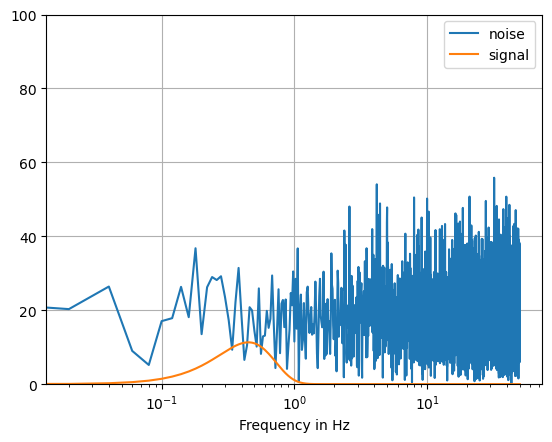

In [49]:
nhat = fft(noise,n=Nfft)
plt.plot(freqVec, np.abs(nhat[:Nfft//2]))
plt.plot(freqVec, np.abs(Zhat[:Nfft//2]))
plt.xscale('log')
plt.legend(['noise','signal'])
plt.xlabel('Frequency in Hz')
plt.ylim([0,100])   
plt.grid()

OK, they look very different in the spectral domain!
Let's add noise to the data and plot it.

We will tune a signal to noise ratio to multiply the noise level relative to the signal level. We define this as the max absolute amplitude of the signal, divided by the max absolute amplitude of the noise

In [50]:
SNR = 100 # signal to noise ratio

Now normalize both noise and signal amplitudes.

In [51]:
s /= np.max(np.abs(s)) # normalize the signal
noise /= np.max(np.abs(noise)) # normalize the noise    

Text(0.5, 0, 'Time in s')

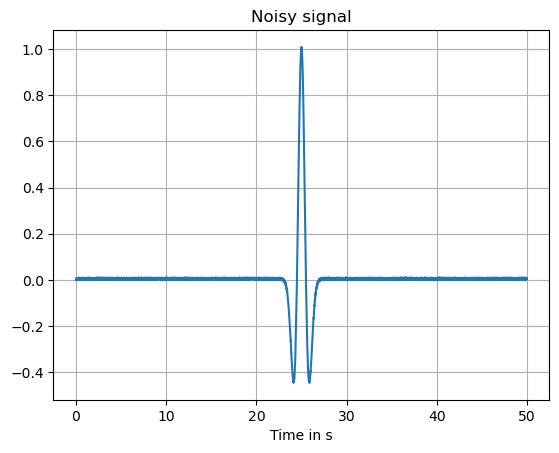

In [52]:
noisy_signal = s + noise/SNR
plt.plot(t,noisy_signal)
plt.grid()
plt.title('Noisy signal')
plt.xlabel('Time in s')

Noise may have different frequency content, or *color*. We can construct a time series of noise based on its Fourier amplitude spectrum.

In [53]:
from scipy.fftpack import ifft
# random phase
NN = 2*np.pi*np.random.uniform(-1,1,Nfft//2)-np.pi
newnoiseF=np.zeros(Nfft,dtype=np.complex_)
for i in range(Nfft//2):
    newnoiseF[i] = np.exp(1j*NN[i])
    newnoiseF[-i] = np.conj(newnoiseF[i])
newnoiseF[0] = 0
noise = ifft(newnoiseF).real

Text(0.5, 1.0, 'Noise with random phase and white spectrum')

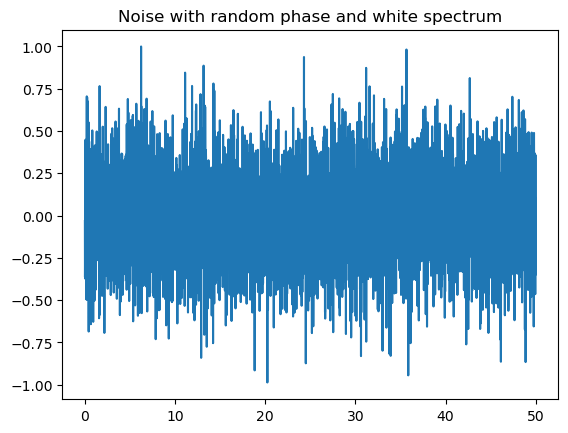

In [54]:
noise/=np.max(np.abs(noise)) # normalize the noise  
plt.plot(t,noise)
plt.title('Noise with random phase and white spectrum')

In [55]:
SNR=1

Add the new noise and the signal (Ricker wavelet) and plot them in time and frequency domain

In [56]:
news = s+noise/SNR

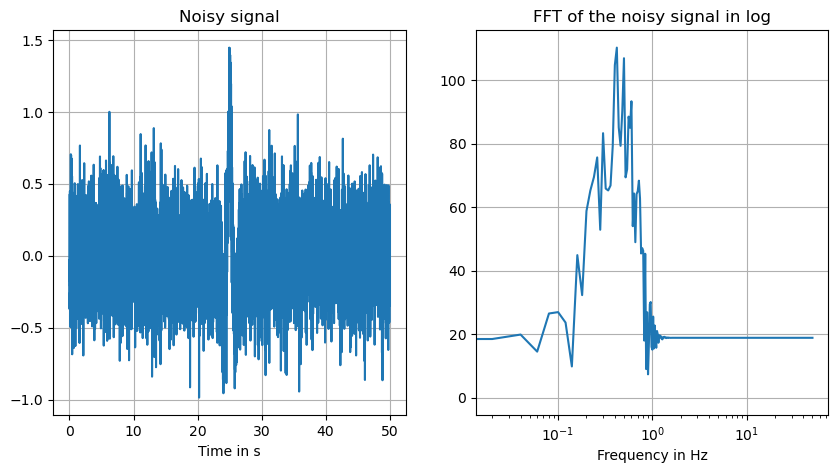

In [57]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(t,news)
ax[0].set_title('Noisy signal')
ax[0].set_xlabel('Time in s')
ax[0].grid()
ax[1].plot(freqVec, np.abs(fft(news,n=Nfft)[:Nfft//2]))
ax[1].set_xscale('log')
ax[1].grid()
ax[1].set_xlabel('Frequency in Hz')
ax[1].set_title('FFT of the noisy signal in log');

Let's compare the data distribution between the pure signal, the noise signal, and the combined signals.

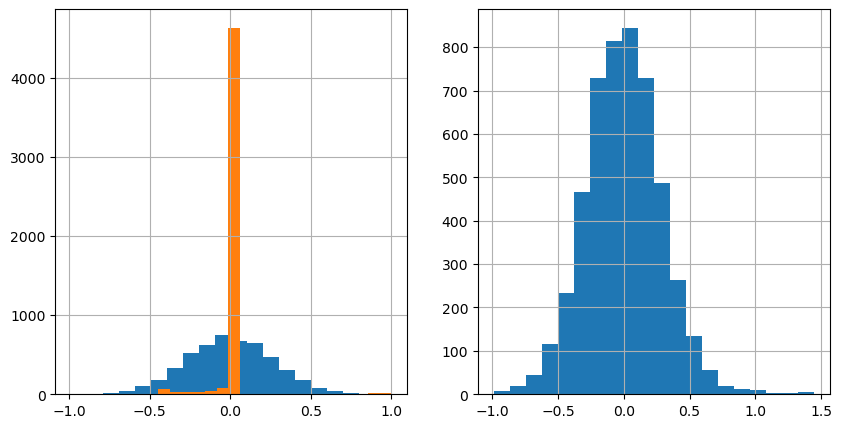

In [58]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(noise,bins=20);ax[0].grid()
ax[0].hist(s,bins=20);
ax[1].hist(news,bins=20);ax[1].grid();

Now in class, calculate the statistical moments between the clean data, the noise, and the noisy data. Explore what features might be discriminate between **signal** and **noise** and explore their sensitivity to noise levels.

In [59]:
# calculat statistical moment of the signal
from scipy.stats import moment
print('The first moment of the signal is:',moment(s,1))
print('The second moment of the signal is:',moment(s,2))
print('The third moment of the signal is:',moment(s,3))
print('The fourth moment of the signal is:',moment(s,4))

# calculate the statistical moment of the noise
print('The first moment of the noise is:',moment(noise,1))
print('The second moment of the noise is:',moment(noise,2))
print('The third moment of the noise is:',moment(noise,3))
print('The fourth moment of the noise is:',moment(noise,4))

The first moment of the signal is: 0.0
The second moment of the signal is: 0.0132973926342017
The third moment of the signal is: 0.006434906304516136
The fourth moment of the signal is: 0.007495006078435612
The first moment of the noise is: 0.0
The second moment of the noise is: 0.07094755358789713
The third moment of the noise is: -0.00015211022576318623
The fourth moment of the noise is: 0.015246388348034143


In [60]:
# which moment is the most important for the signal?


## 4. Realistic or physics-informed synthetic Data and Noise [Level 2]

In this case, we can create a time series that has the similar noise structure than the realistic noise.

These values may mean nothing without some additional context. We can download seismic noise data to see if the earthquake waveforms are statistically different from the noise. For that, we will download the same length of data prior to the earthquake:

In [61]:
!pip install obspy
import obspy
import obspy.clients.fdsn.client as fdsn
from obspy import UTCDateTime 



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [62]:
# Download seismic data
network = 'UW'
station = 'RATT'
channel = 'HHZ'# this channel gives a low frequency, 1Hz signal.
Tstart = UTCDateTime(2021,7,29,6,15)
fdsn_client = fdsn.Client('IRIS') # client to query the IRIS DMC server
# call to download the specific data: noise waveforms
N = fdsn_client.get_waveforms(network=network, station=station, location='--', channel=channel, starttime=Tstart-7200, \
    endtime=Tstart, attach_response=True)
N.merge(); N.detrend(type='linear');N[0].taper(max_percentage=0.05)

UW.RATT..HHZ | 2021-07-29T04:15:00.000000Z - 2021-07-29T06:14:59.990000Z | 100.0 Hz, 720000 samples

From the Fourier domain, use ``np.rand[n]`` functions to create a random *phase spectrum* between -$\pi$ and $\pi$. For the *amplitude spectrum*, you may choose a *white* color, which means that the amplitude spectrum is flat and equal at all frequencies; you may choose a *color* for the spectrum, for instance an amplitude that decays with $1/f$; you may choose the spectrum of the realistic noise, for instance extracted from raw data.


### Random noise

Below, use the random function to create a synthetic noise. 
1. Create an array of random numbers between -1 and 1 of length the same length as the data Z.
2. Calculate the signal-to-noise ratio, for instance: 

$ SNR = 20 log_{10} (\frac{\max(|signal|)}{\max(|noise|)})$

or simply

$SNR = (\frac{\max(|signal|)}{\max(|noise|)})$

3. Add the synthetic noise with a varying SNR

In [63]:
# 1. Create a time series of the synthetic noise
import numpy.random as random

new_noise= random.randn(len(t))

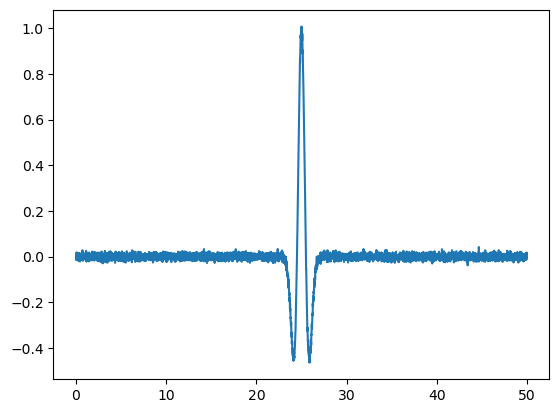

In [64]:
SNR=100.
plt.plot(t,s/np.max(np.abs(s)) +new_noise/SNR);

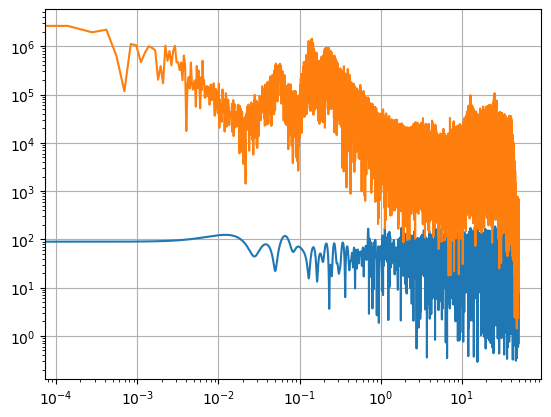

In [65]:
# Make noise based on the spectrum of the noise data
npts = N[0].stats.npts-1
## FFT the signals
# fill up until 2^N value to speed up the FFT
Nfft = next_fast_len(int(N[0].data.shape[0]-1)) # this will be an even number
freqVec = fftfreq(Nfft, d=N[0].stats.delta)[:Nfft//2]
Nat = fft(new_noise,n=Nfft)#/np.sqrt(Z[0].stats.npts)


plt.plot(freqVec,np.abs(Nat[:Nfft//2]))

N.taper(max_percentage=0.05)
Nhat = fft(N[0].data,n=Nfft)#/np.sqrt(Z[0].stats.npts)

plt.plot(freqVec,np.abs(Nhat[:Nfft//2]))
plt.xscale('log');plt.yscale('log');plt.grid()


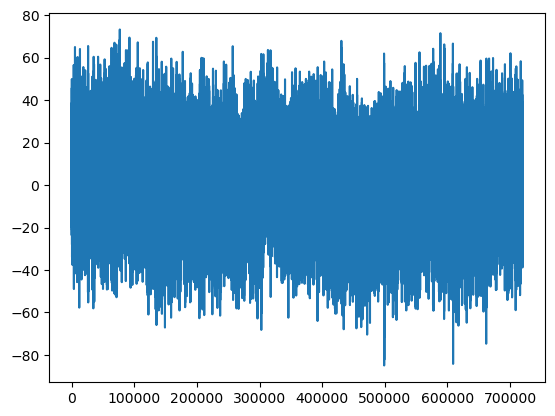

In [66]:
from scipy.fftpack import ifft
Nhat = fft(N[0].data,n=Nfft)#/np.sqrt(Z[0].stats.npts)
NN = 2*np.pi*random.uniform(-1,1,Nfft//2)-np.pi
newcrap=np.zeros(Nfft,dtype=np.complex_)

for i in range(Nfft//2):
    newcrap[i] = np.abs(Nhat[i])*np.exp(1j*NN[i])
    newcrap[-i] = np.conj(NN[i])
newnoiseF[0] = 0
crap = ifft(newcrap).real
plt.plot(crap)

Text(0.5, 1.0, 'Histogram of the noise')

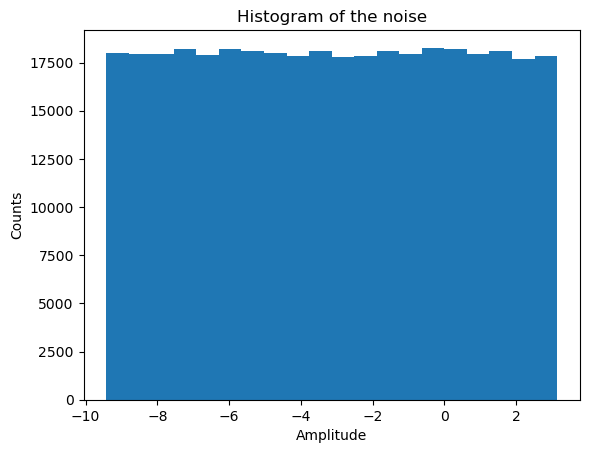

In [79]:
NN = 2*np.pi*random.uniform(-1,1,Nfft//2)-np.pi
# plot a histogram of the noise
plt.hist(NN,bins=20)
plt.xlabel('Amplitude')
plt.ylabel('Counts')
plt.title('Histogram of the noise phase')

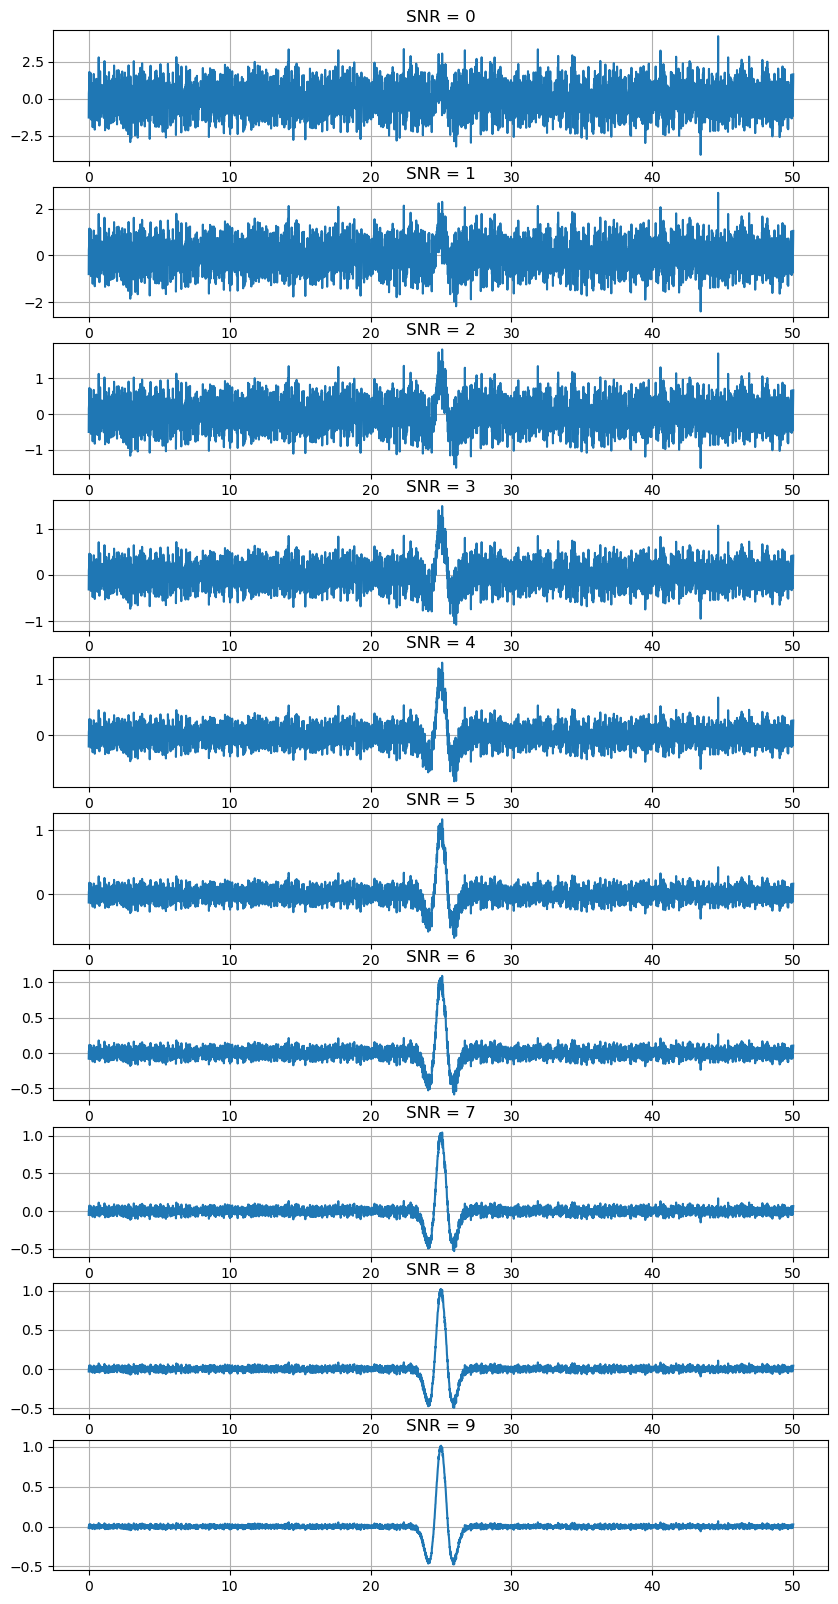

In [76]:
# plot the data over various SNR
# create a figure with 10 subplots as rows
fig,ax = plt.subplots(10,1,figsize=(10,20))
for i,snr in enumerate([np.power(10,i/5) for i in range(10)]):
    ax[i].plot(t,s/np.max(np.abs(s)) +new_noise/snr);
    ax[i].set_title('SNR = '+str(i))
    ax[i].grid()
plt.show()

## Exercise

Create synthetic noise for images.